# Toyota-corolla-prices-regression-analysis

## <span id="1"></span> ** 1. Overview **

Columns:
- <b> Age: </b> Age in years
- <b> KM: </b> Accumulated Kilometers on odometer
- <b> FuelType: </b> Fuel Type (Petrol, Diesel, CNG)
- <b> HP: </b> Horse Power
- <b> MetColor: </b> Metallic Color? (Yes=1, No=0)
- <b> Automatic: </b> Automatic ( (Yes=1, No=0)
- <b> CC: </b> Cylinder Volume in cubic centimeters
- <b> Doors: </b> Number of doors
- <b> Weight: </b> Weight in Kilograms
- <b> Price: </b> Offer Price in EUROs

## <span id="2"></span> ** 2. Importing Libraries and Reading the Dataset **

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [31]:
dataset = pd.read_csv('Data_set/ToyotaCorolla.csv')
dataset.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [32]:
dataset.count()

Price        1436
Age          1436
KM           1436
FuelType     1436
HP           1436
MetColor     1436
Automatic    1436
CC           1436
Doors        1436
Weight       1436
dtype: int64

In [33]:
dataset.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


## <span id="3"></span> ** 3. Data Preprocessing and Visualization **

In [34]:
dataset.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

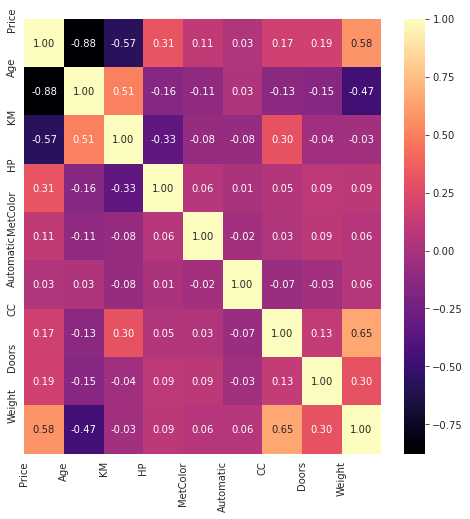

In [35]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

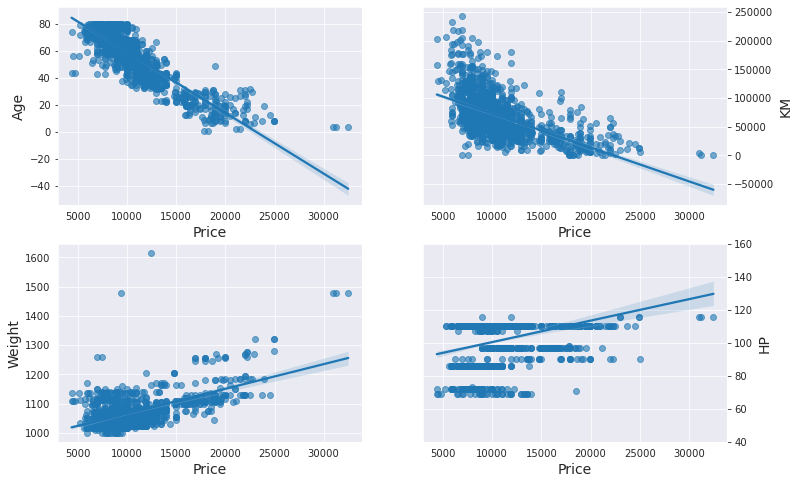

In [36]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(x = 'Price', y = 'Age', data = dataset, scatter_kws={'alpha':0.6}, ax = axes[0,0])
axes[0,0].set_xlabel('Price', fontsize=14)
axes[0,0].set_ylabel('Age', fontsize=14)
axes[0,0].yaxis.tick_left()

sns.regplot(x = 'Price', y = 'KM', data = dataset, scatter_kws={'alpha':0.6}, ax = axes[0,1])
axes[0,1].set_xlabel('Price', fontsize=14)
axes[0,1].set_ylabel('KM', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

sns.regplot(x = 'Price', y = 'Weight', data = dataset, scatter_kws={'alpha':0.6}, ax = axes[1,0])
axes[1,0].set_xlabel('Price', fontsize=14)
axes[1,0].set_ylabel('Weight', fontsize=14)

sns.regplot(x = 'Price', y = 'HP', data = dataset, scatter_kws={'alpha':0.6}, ax = axes[1,1])
axes[1,1].set_xlabel('Price', fontsize=14)
axes[1,1].set_ylabel('HP', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()
axes[1,1].set(ylim=(40,160))

plt.show()

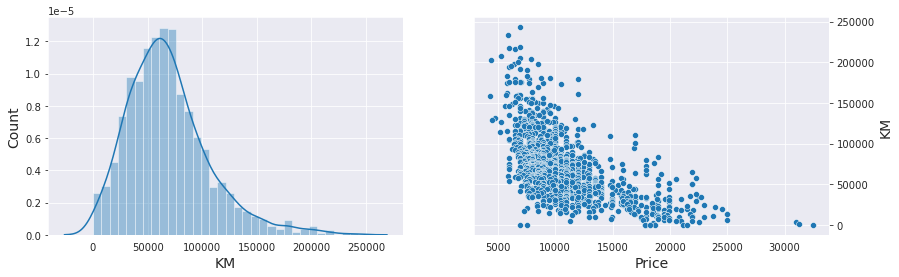

In [37]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['KM'], ax = axes[0])
axes[0].set_xlabel('KM', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.scatterplot(x = 'Price', y = 'KM', data = dataset, ax = axes[1])
axes[1].set_xlabel('Price', fontsize=14)
axes[1].set_ylabel('KM', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

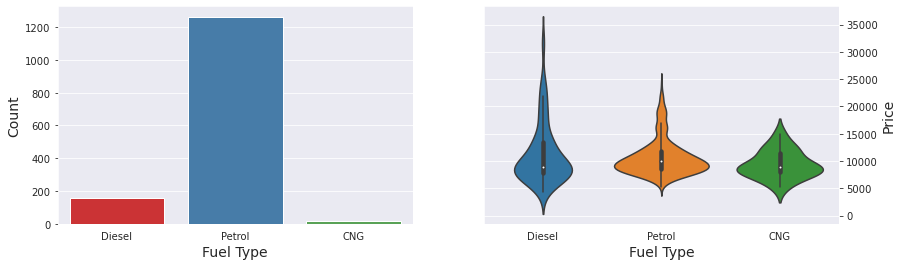

In [38]:
fuel_list= Counter(dataset['FuelType'])
labels = fuel_list.keys()
sizes = fuel_list.values()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.countplot(dataset['FuelType'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Fuel Type', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'FuelType', y = 'Price', data = dataset, ax = axes[1])
axes[1].set_xlabel('Fuel Type', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

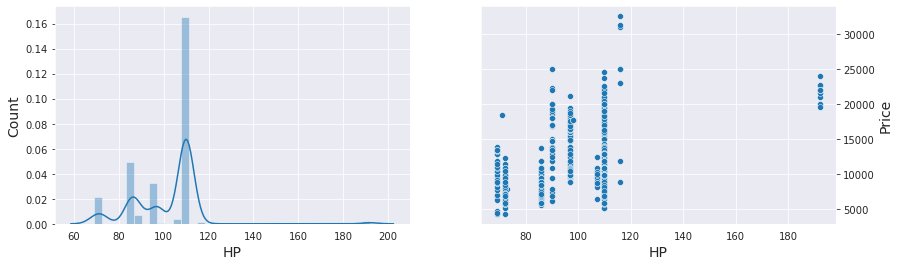

In [39]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['HP'], ax = axes[0])
axes[0].set_xlabel('HP', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.scatterplot(x = 'HP', y = 'Price', data = dataset, ax = axes[1])
axes[1].set_xlabel('HP', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

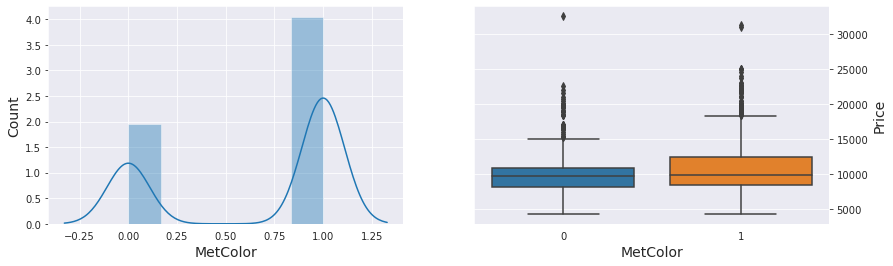

In [40]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['MetColor'], ax = axes[0])
axes[0].set_xlabel('MetColor', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'MetColor', y = 'Price', data = dataset, ax = axes[1])
axes[1].set_xlabel('MetColor', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

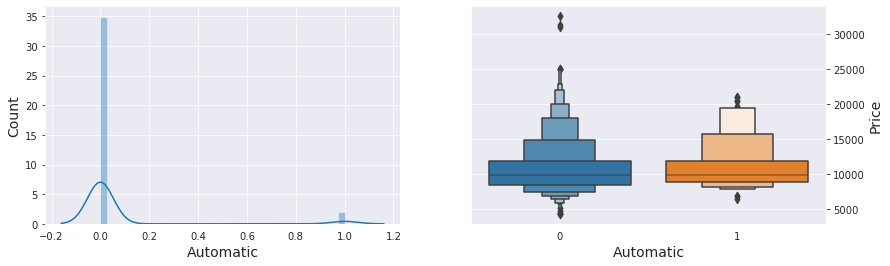

In [41]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Automatic'], ax = axes[0])
axes[0].set_xlabel('Automatic', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'Automatic', y = 'Price', data = dataset, ax = axes[1])
axes[1].set_xlabel('Automatic', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

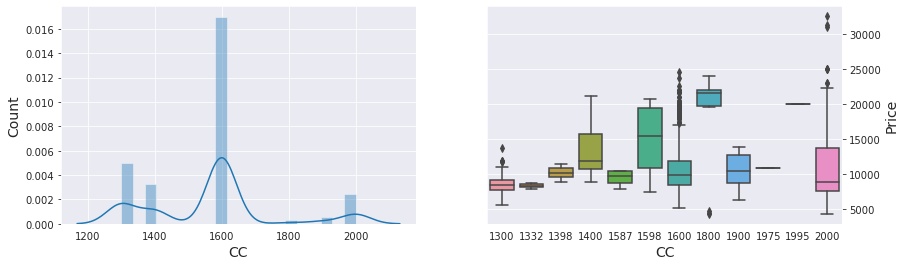

In [42]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['CC'], ax = axes[0])
axes[0].set_xlabel('CC', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'CC', y = 'Price', data = dataset, ax = axes[1])
axes[1].set_xlabel('CC', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

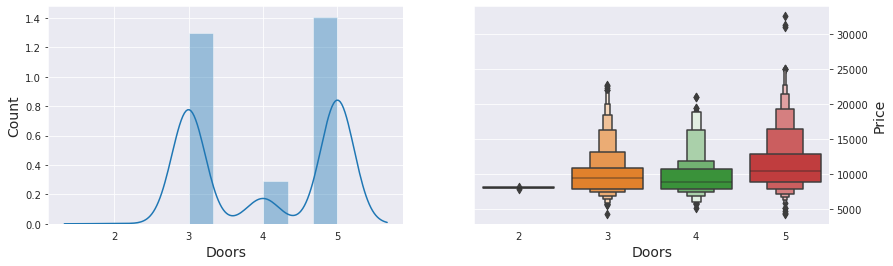

In [43]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Doors'], ax = axes[0])
axes[0].set_xlabel('Doors', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'Doors', y = 'Price', data = dataset, ax = axes[1])
axes[1].set_xlabel('Doors', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

In [44]:
dataset = pd.get_dummies(dataset)

In [45]:
dataset.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,0,1,0


In [46]:
X = dataset.drop('Price', axis = 1).values
y = dataset.iloc[:, 0].values.reshape(-1,1)

In [47]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [48]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1077, 11)
Shape of X_test:  (359, 11)
Shape of y_train:  (1077, 1)
Shape of y_test (359, 1)


## <span id="4"></span> ** 4. Regression Models **

### <span id="5"></span> ** Linear Regression **

In [49]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [50]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.8480754345159047
R2_score (train):  0.8702260786694702
R2_score (test):  0.8621869690956067
RMSE:  1398.4596051422193


### <span id="6"></span> ** Polynomial Regression - 2nd degree **

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [52]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.8480754345159047
R2_score (train):  0.9157086185578454
R2_score (test):  0.761982519298394
RMSE:  1837.8463965637534


### <span id="7"></span> ** Ridge Regression **

In [53]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Ridge(alpha=1777, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', Ridge(alpha=1777))])

In [54]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.7785178588873501
R2_score (train):  0.8700098556004301
R2_score (test):  0.8697806448706529
RMSE:  1359.3852529159844


### <span id="8"></span> ** Lasso Regression **

In [55]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Lasso(alpha=2.36, fit_intercept=True, tol = 0.0199, max_iter=2000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', Lasso(alpha=2.36, max_iter=2000, tol=0.0199))])

In [56]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.7427712620107869
R2_score (train):  0.9273633923675705
R2_score (test):  0.9022945020939628
RMSE:  1177.5091354603462


### <span id="9"></span> ** Support Vector Regression **

In [57]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

In [58]:
# Fitting the SVR Model to the dataset
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

SVR()

In [59]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_svr = cross_val_score(estimator = regressor_svr, X = X_scaled, y = y_scaled.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score the Test set results
y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting RMSE the Test set results
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV:  0.8717816523882803
R2_score (train):  0.9037407869672544
R2_score (test):  0.8360054677807698
RMSE:  1525.5254886040098


### <span id="10"></span> ** Decision Tree Regression **

In [60]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [61]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.8193262156045742
R2_score (train):  1.0
R2_score (test):  0.8444979033079358
RMSE:  1485.5008637345145


### <span id="11"></span> ** Random Forest Regression **

In [62]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 1200, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=1200, random_state=0)

In [63]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8956356411408478
R2_score (train):  0.986168176541885
R2_score (test):  0.9159155034776082
RMSE:  1092.352351998201


## <span id="12"></span> ** 5. Measuring the Error **

In [64]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [65]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,1398.459605,0.870226,0.862187,0.848075
1,Polynomial Regression (2nd),1837.846397,0.915709,0.761983,0.848075
2,Ridge Regression,1359.385253,0.870010,0.869781,0.778518
3,Lasso Regression,1177.509135,0.927363,0.902295,0.742771
4,Support Vector Regression,1525.525489,0.903741,0.836005,0.871782
5,Decision Tree Regression,1485.500864,1.000000,0.844498,0.819326
6,Random Forest Regression,1092.352352,0.986168,0.915916,0.895636


### <span id="13"></span> ** Visualizing Models Performance **

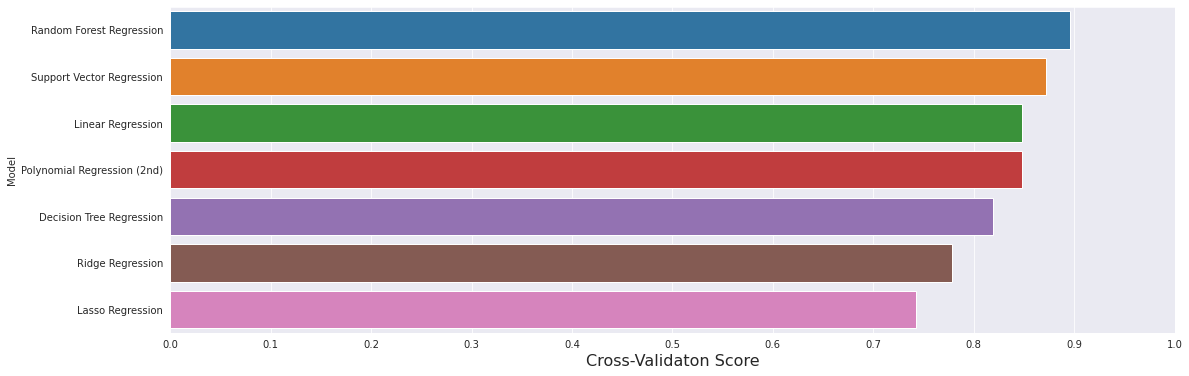

In [66]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

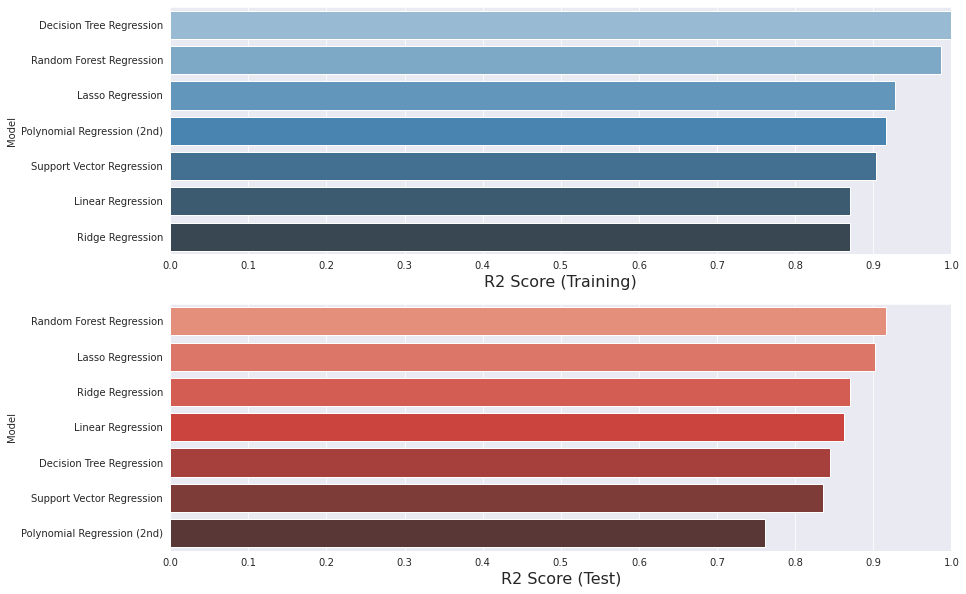

In [67]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

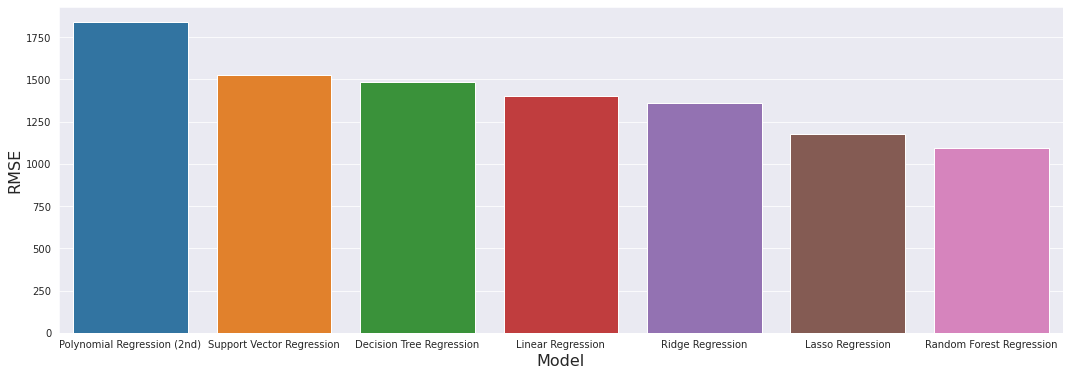

In [68]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

## <span id="14"></span> ** 6. Conclusion **

In this kernel, I have built 7 regression models using Toyota Corolla Dataset. These are linear, polynomial, ridge, lasso,  svr, decision tree and random forest regression. 
